In [1]:
from ConvergenceAnalysis import *


In [2]:
fd_data

,Molecule,FD
0,He,1.322234
1,Be,45.616381
2,Ne,2.376747
3,Mg,81.593730
4,Ar,10.758002
5,N2,15.030438
6,F2,14.642223
7,NaCl,28.700184
8,LiCl,24.532474
9,CO,14.466840


In [3]:
def process_data(base_path):
    base_high = base_path.joinpath('high-high')
    base_low = base_path.joinpath('low-low')

    mols = fd_data['Molecule'].to_list()
    low_data = get_database_residuals_z(mols, base_low)
    high_data = get_database_residuals_z(mols, base_high)
    # add column to low_data and high_data indicating low or high called ground state
    low_data['Ground Protocol'] = 'Low'
    high_data['Ground Protocol'] = 'High'
    # combine dataframe
    data = pd.concat([low_data, high_data])

    # concatenate the protocol and ground state columns to make a new column
    data['Response Protocol'] = data['Protocol'].astype(str)
    # if protocol is 'High' or 'Low' then set it to 'H' or 'L' 
    data.loc[data['Response Protocol'] == 'High', 'Protocol'] = 'High'
    data.loc[data['Response Protocol'] == 'Medium', 'Protocol'] = 'Low'
    data.loc[data['Response Protocol'] == 'Guess', 'Protocol'] = 'Guess'
    return data



In [6]:
data_path=Path('/home/ahurta92/data')
november_absolute_path = Path('/home/ahurta92/data/november_absolute_kain/')

fd_compare2 = data_path/ Path('fd_compare2')
fd_compare_data = process_data(fd_compare2)
november_absolute_data = process_data(november_absolute_path)

paper_path = Path('response_paper_figures')



He
He /home/ahurta92/data/fd_compare2/low-low/hf/He/dipole_hf_0-000000/response_base.json
He /home/ahurta92/data/fd_compare2/low-low/hf/He/dipole_hf_0-395340/response_base.json
/home/ahurta92/data/fd_compare2/low-low/hf/He/beta.json
     omega_a   omega_b   omega_c  \
0   0.000000  0.000000  0.000000   
1   0.049418  0.000000  0.049418   
2   0.098835  0.000000  0.098835   
3   0.148253  0.000000  0.148253   
4   0.197670  0.000000  0.197670   
5   0.247088  0.000000  0.247088   
6   0.296505  0.000000  0.296505   
7   0.345923  0.000000  0.345923   
8   0.395340  0.000000  0.395340   
9   0.049418  0.049418  0.000000   
10  0.098835  0.049418  0.049418   
11  0.148253  0.049418  0.098835   
12  0.197670  0.049418  0.148253   
13  0.247088  0.049418  0.197670   
14  0.296505  0.049418  0.247088   
15  0.345923  0.049418  0.296505   
16  0.395340  0.049418  0.345923   
17  0.098835  0.098835  0.000000   
18  0.148253  0.098835  0.049418   
19  0.197670  0.098835  0.098835   
20  0.24708

In [7]:
fd_compare_data

,Protocol,rz,dz,znorm,MRA,FD,Percent Error,Absolute Percent Error,Absolute Residual Z,Molecule,Ground Protocol,Response Protocol
0,Guess,0.000543,0.001384,2.021339,28.677129,28.700184,-0.080332,0.080332,0.001098,NaCl,Low,Guess
1,Low,0.000065,0.000095,2.021686,28.686944,28.700184,-0.046131,0.046131,0.000131,NaCl,Low,Low
2,Guess,0.000655,0.000743,1.496191,14.463590,14.466840,-0.022464,0.022464,0.000979,CO,Low,Guess
3,Low,0.000095,0.000159,1.496428,14.467207,14.466840,0.002535,0.002535,0.000143,CO,Low,Low
0,Guess,0.000969,0.004567,2.021675,28.687891,28.700184,-0.042832,0.042832,0.001959,NaCl,High,Guess
1,Low,0.000049,0.000029,2.022185,28.701260,28.700184,0.003749,0.003749,0.000098,NaCl,High,Low
2,High,0.000011,0.000002,2.022186,28.701232,28.700184,0.003650,0.003650,0.000022,NaCl,High,High
3,Guess,0.000820,0.001062,1.496284,14.460688,14.466840,-0.042524,0.042524,0.001227,CO,High,Guess
4,Low,0.000080,0.000026,1.496512,14.466900,14.466840,0.000413,0.000413,0.000119,CO,High,Low
5,High,0.000010,0.000002,1.496513,14.466822,14.466840,-0.000122,0.000122,0.000015,CO,High,High


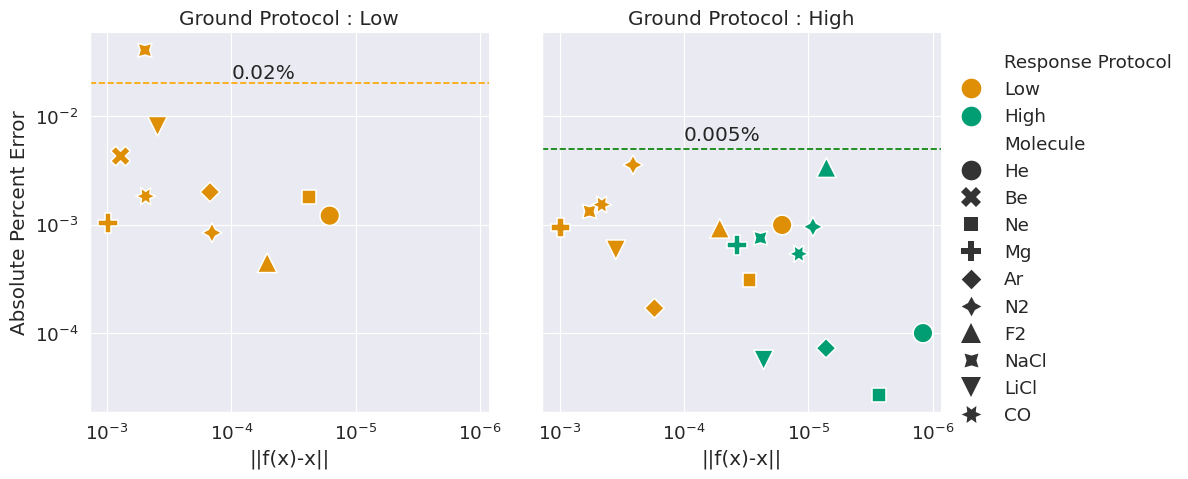

In [8]:
data = november_absolute_data
#data = fd_compare_data

sns.set_context("paper", font_scale=1.50)
sns.set_style("darkgrid")
sns.set_palette("colorblind")
style = 'Molecule'
hue = 'Response Protocol'
hue_order = ['Low', 'High']
data= data.query('Protocol.isin(@hue_order)')
# colormap is colorblind staring with index 1
colors = sns.color_palette("colorblind", 3)
# grab second and third colors in list
colors = [colors[1], colors[2]]
# create palette from colors
palette = sns.color_palette(colors)
s = 200
x = 'dz'
x = 'Absolute Residual Z'
g = sns.relplot(x=x, y='Absolute Percent Error', data=data, style=style, hue=hue, s=s,hue_order=hue_order,
                col='Ground Protocol',palette=colors )
# set the subplot titles to Ground Protocol = H or M
g.set_titles(col_template="Ground Protocol : {col_name}")
# increase the font of the legend

for ax in g.axes.flat:
    #ax.plot([1e-6,1e-2],[1e-6,1e-2], ls='--', color='black')
    ax.set_xscale('log')
    ax.set_yscale('log')
    # write an annotation indicating the green line is .005
    # only on first left plot
    if ax == g.axes.flat[0]:
        ax.axhline(.02, ls='--', color='orange')
        ax.annotate('0.02%', xy=(1e-4, .02), xytext=(1e-4, .022))
    else:
        ax.axhline(5e-3, ls='--', color='green')
        ax.annotate('0.005%', xy=(1e-4, .005), xytext=(1e-4, .006))
        
# Draw a y=x line on each plot
for ax in g.axes.flat:
    if x=='dz':
        ax.set_xlabel(r'$\Delta \rho_{z}(x)$')
    else:
        ax.set_xlabel('||f(x)-x||')
    # y label is percent error of static polarizability
    ax.set_title('{}'.format(ax.get_title()))

g.fig.gca().invert_xaxis()
# Change the marker size in the legend to be larger and more legible
for lh in g.legend.legend_handles: 
    lh._sizes = [100]
# save a high res version
#g.savefig(paper_path.joinpath('mra_convergence.png'),dpi=600)


In [9]:
data=november_absolute_data
# first rename Ground Protocol  and Response Protocol to GP and RP
data.rename(columns={'Ground Protocol':'GP','Response Protocol':'RP'},inplace=True)

low_data=data.query('GP=="Low"').query('RP=="Low"')
high_data=data.query('GP=="High"').query('RP=="High"')

    
data=pd.concat([low_data,high_data])

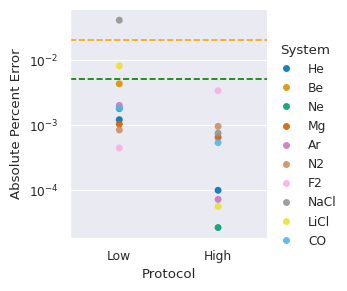

In [10]:
# violin plot strip plot

sns.set_context("paper", font_scale=1.50)
sns.set_style("darkgrid")
sns.set_palette("colorblind")
style = 'Molecule'
hue = 'Molecule'
kind='strip'
jitter=False
height=3
aspect_ratio=1.0


with sns.plotting_context('paper', font_scale=1.00):
    g = sns.catplot(x='Protocol', y='Absolute Percent Error', hue='Molecule',
                    data=data,
                    kind=kind, dodge=jitter, jitter=jitter,
                    height=height, aspect=aspect_ratio, sharey=True,
                     alpha=0.9,
                    )
    ax=g.axes.flat[0]
    ax.axhline(.02, ls='--', color='orange')
    ax.axhline(.005, ls='--', color='green')
    ax.set_yscale('log', )
    # adjust legend
    g._legend.set_title('System')


g.savefig(paper_path.joinpath('mra_convergence.png'),dpi=600)



In [14]:

with sns.plotting_context('paper', font_scale=1.00):
    facet_kws = {'margin_titles': True, 'despine': False}
    g = sns.catplot(x='Protocol', y='Percent Error', hue='Molecule',
                    data=data,
                    kind=kind, dodge=jitter, jitter=jitter,
                    height=height, aspect=aspect_ratio, sharey=True,
                    facet_kws=facet_kws, alpha=0.9,
                    )
    ax=g.axes.flat[0]
    ax.axhline(.05, ls='--', color='orange')
    ax.axhline(.005, ls='--', color='green')
    ax.axhline(-.05, ls='--', color='orange')
    ax.axhline(-.005, ls='--', color='green')
    #ax.set_yscale('log', )



TypeError: seaborn.axisgrid.FacetGrid() got multiple values for keyword argument 'margin_titles'

In [67]:
data = fd_compare_data
data = november_absolute_data

sns.set_context("paper", font_scale=1.50)
sns.set_style("darkgrid")
sns.set_palette("colorblind")
style = 'Molecule'
hue = 'Response Protocol'
s = 200
x = 'dz'
g = sns.relplot(x=x, y='Percent Error', data=data, style=style, hue=hue, s=s,
                col='Ground Protocol')
# set the subplot titles to Ground Protocol = H or M
g.set_titles(col_template="Ground Protocol : {col_name}")
# increase the font of the legend

for ax in g.axes.flat:
    ax.set_xscale('log')
    ax.set_yscale('symlog', linthresh=1e-4)
    # write an annotation indicating the green line is .005
    # only on first left plot
    if ax == g.axes.flat[0]:
        ax.axhline(.05, ls='--', color='orange')
        ax.axhline(-.05, ls='--', color='orange')
        ax.annotate('0.02%', xy=(1e-4, .02), xytext=(1e-4, .022))
        ax.annotate('-0.02%', xy=(1e-4, -.02), xytext=(1e-4, -.022))
    else:
        ax.axhline(.005, ls='--', color='green')
        ax.axhline(-.005, ls='--', color='green')
        ax.annotate('0.005%', xy=(1e-4, .005), xytext=(1e-4, .006))
        ax.annotate('-0.005%', xy=(1e-4, -.005), xytext=(1e-4, -.006))

# Draw a y=x line on each plot
for ax in g.axes.flat:
    ax.set_xlabel(r'$\Delta \rho_{z}(x)$')
    # y label is percent error of static polarizability

g.fig.gca().invert_xaxis()
# Change the marker size in the legend to be larger and more legible
for lh in g.legend.legend_handles:
    lh._sizes = [100]


ValueError: Could not interpret value `Response Protocol` for parameter `hue`

In [10]:
MadnessResponse('NaCl','hf','dipole',november_absolute_path.joinpath('low-low')).plot_residuals()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/madness_data/november_absolute_kain/low-low/json_data/frequency.json'

In [18]:
data.query('Protocol=="Medium" and Molecule=="NaCl"')
     
 

,Protocol,rz,dz,znorm,MRA,FD,Percent Error,Absolute Percent Error,Absolute Residual Z,Molecule,Ground Protocol,Response Protocol
15,Medium,0.000246,0.000030,2.021737,28.688582,28.700184,-0.040424,0.040424,0.000497,NaCl,Medium,Medium
22,Medium,0.000285,0.000025,2.022149,28.700564,28.700184,0.001325,0.001325,0.000576,NaCl,High,Medium


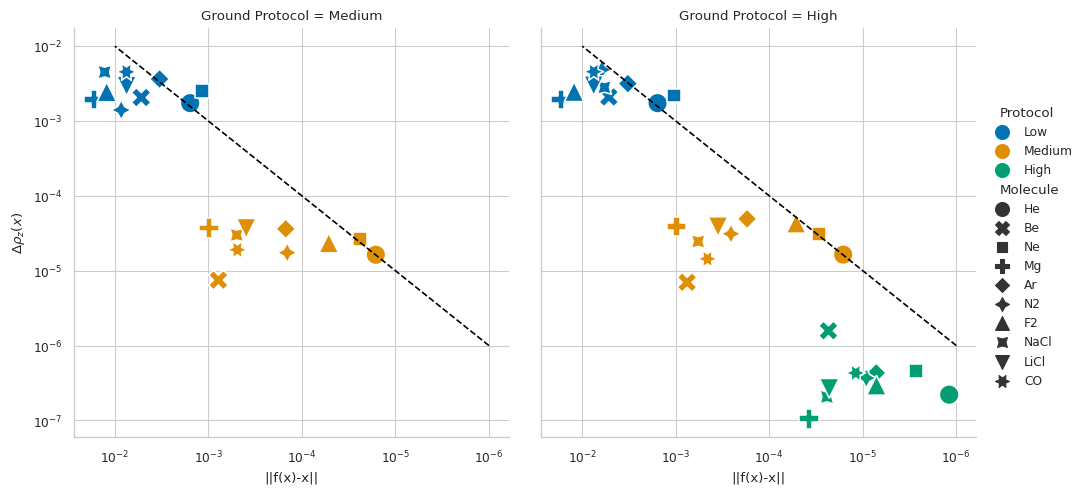

In [20]:


sns.set_context("paper", font_scale=1)
sns.set_style("whitegrid")
sns.set_palette("colorblind")
style = 'Molecule'
hue = 'Protocol'
s = 200
x = 'dz'
y = 'Absolute Residual Z'

g = sns.relplot(x=y, y=x, data=data, hue=hue,style=style, s=s,
                col='Ground Protocol')

for ax in g.axes.flat:
    ax.set_yscale('log')
    ax.set_xscale('log')
# Change the marker size in the legend to be larger and more legible
for lh in g.legend.legend_handles:
    lh._sizes = [100]
    
# draw a y=x line on each plot

for ax in g.axes.flat:
    ax.plot([1e-6,1e-2],[1e-6,1e-2], ls='--', color='black')
    ax.set_xlabel('||f(x)-x||')
    ax.set_ylabel(r'$\Delta \rho_{z}(x)$')
    ax.set_title('{}'.format(ax.get_title()))

g.fig.gca().invert_xaxis()



In [21]:

mols=data.Molecule.unique().tolist()


In [22]:
from DataAnalysisClass import *
single = ['aug-cc-pVDZ', 'aug-cc-pVTZ', 'aug-cc-pVQZ', 'aug-cc-pV5Z', 'aug-cc-pV6Z']
single_polarized = ['aug-cc-pCVDZ', 'aug-cc-pCVTZ', 'aug-cc-pCVQZ']
double = ['d-aug-cc-pVDZ', 'd-aug-cc-pVTZ', 'd-aug-cc-pVQZ', 'd-aug-cc-pV5Z', 'd-aug-cc-pV6Z']
double_polarized = ['d-aug-cc-pCVDZ', 'd-aug-cc-pCVTZ', 'd-aug-cc-pCVQZ']
all_basis_sets = single + single_polarized+ double  + double_polarized


In [23]:
low_data=PolarizabilityData(mols,'hf','dipole',all_basis_sets,november_absolute_path.joinpath
('low-low'),overwrite=True)
high_data=PolarizabilityData(mols,'hf','dipole',all_basis_sets,november_absolute_path
                                .joinpath
('high-high'),overwrite=True)


He /mnt/data/madness_data/november_absolute_kain/low-low/hf/He/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/november_absolute_kain/low-low/hf/He/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/november_absolute_kain/low-low/hf/He/beta.json'
Be /mnt/data/madness_data/november_absolute_kain/low-low/hf/Be/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/november_absolute_kain/low-low/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/november_absolute_kain/low-low/hf/Be/beta.json'
Ne /mnt/data/madness_data/november_absolute_kain/low-low/hf/Ne/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/november_absolute_kain/low-low/hf/Ne/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/november_absolute_kain/low-low/hf/Ne/beta.json'
Mg /mnt/data/madness_data/november_absolute_kain/low-low/hf/Mg/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/november_absolute_kain/low-low/hf/Mg

In [25]:
low_data.save_dfs()
high_data.save_dfs()



'NoneType' object has no attribute 'copy'
Could not save eigen_diff
'NoneType' object has no attribute 'copy'
Could not save eigen_diff


In [26]:

low_z_data=create_z_data(low_data)
# create Protocol column
low_z_data['Protocol']='Medium'
high_z_data=create_z_data(high_data)
high_z_data['Protocol']='High'
z_data=pd.concat([low_z_data,high_z_data])
z_data





,molecule,basis,ij,omega,alpha,FD,Percent Error,MRA Percent Error,Absolute Percent Error,MRA,Protocol
8,He,MRA,zz,0,1.322250,1.322234,0.001230,0.001230,0.001230,MRA,Medium
17,Be,MRA,zz,0,45.618340,45.616381,0.004295,0.004295,0.004295,MRA,Medium
26,Ne,MRA,zz,0,2.376704,2.376747,-0.001795,-0.001795,0.001795,MRA,Medium
35,Mg,MRA,zz,0,81.592880,81.593730,-0.001042,-0.001042,0.001042,MRA,Medium
44,Ar,MRA,zz,0,10.758220,10.758002,0.002030,0.002030,0.002030,MRA,Medium
...,...,...,...,...,...,...,...,...,...,...,...
10287,CO,d-aug-cc-pVQZ,zz,0,14.469156,14.466840,0.016012,-0.000553,0.016012,Other,High
10368,CO,d-aug-cc-pV5Z,zz,0,14.466686,14.466840,-0.001065,-0.000553,0.001065,Other,High
10449,CO,d-aug-cc-pCVDZ,zz,0,14.490765,14.466840,0.165376,-0.000553,0.165376,Other,High
10530,CO,d-aug-cc-pCVTZ,zz,0,14.487193,14.466840,0.140685,-0.000553,0.140685,Other,High


['D', 'T', 'Q', '5']


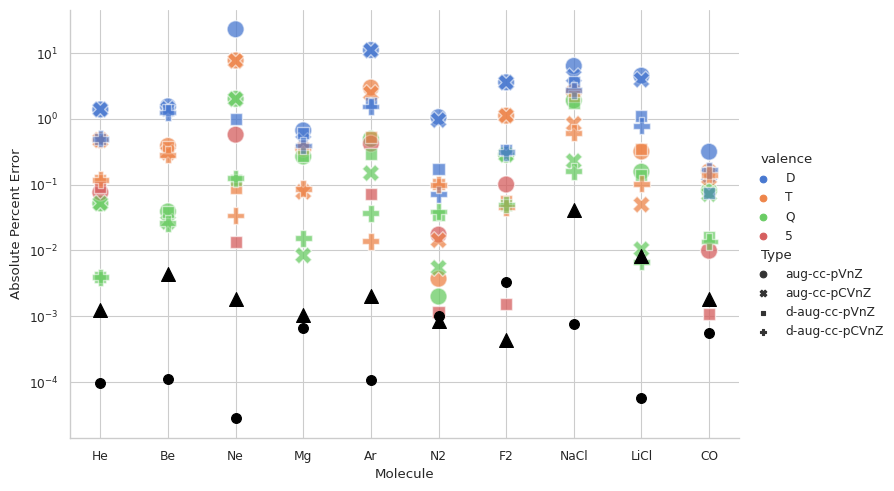

In [27]:

z_abs_error_plot=compare_z_to_basis_set(z_data,y='Absolute Percent Error')
#z_error_plot=compare_z_to_basis_set(z_data,y='Percent Error')
z_abs_error_plot.fig.savefig(paper_path.joinpath('z_abs_error.png'),dpi=600)


In [ ]:
z_data.query('basis=="MRA"').sort_values('molecule')
